In [1]:
import pandas as pd
import numpy as np

In [2]:
column_names = ['TPR','TNR','FPR','FNR','AUC','G-Mean','F1', 'G-Measure']
report = pd.DataFrame(columns = column_names)
knn_df = pd.DataFrame(columns = column_names)
knn_df_dist = pd.DataFrame(columns = column_names)
dtree_depth = pd.DataFrame(columns = column_names)
default = pd.DataFrame(columns = column_names)

In [3]:
import math

def cmdata_report(cm, classifier, data):# add a df as parameter
    total = cm.sum()
    TP = cm[0,0]
    FN = cm[0,1]
    FP = cm[1,0]
    TN = cm[1,1]
    #print("True Positives:", TP)
    #print("False Positives:", FP)
    #print("True Negatives:", TN)
    #print("False Negatives:", FN)
    TPR = TP/(TP+FN)
    TNR = TN/(TN+FP)
    FPR = FP/(FP+TN)
    FNR = FN/(FN+TP)
    #print("TPR(True Positive Rate): ", TPR)
    #print("TNR(True Negative Rate): ", TNR)
    #print("FPR(False Positive Rate): ", FPR)
    #print("FNR(False Negative Rate): ", FNR)
    ratio = (cm[0,0]+cm[1,1])/total
    PPV = TP/(TP+FP)
    #print("PPV(Positive Predict Value): ", PPV)
    #print("Acccuracy:", ratio)
    AUC = (1 + TPR - FPR)/2
    #print("AUC(Area Under Curve): ", AUC)
    GMEAN = math.sqrt(TNR*TPR)
    #print("G-MEAN(Geometric mean): ", GMEAN)
    F1 = 2*TP/(2*TP+FP+FN)
    GMEASURE = math.sqrt(PPV*TPR)
    
    # add a new row with the calculated data
    s = pd.Series([TPR,TNR,FPR,FNR,AUC,GMEAN,F1,GMEASURE], name=classifier, index=report.columns)
    df = data.append(s)
    return df

Method that returns df from sklearn classification report

Source: https://stackoverflow.com/questions/39662398/scikit-learn-output-metrics-classification-report-into-csv-tab-delimited-format

In [4]:
def get_classification_report(y_test, y_pred):
    from sklearn import metrics
    report = metrics.classification_report(y_test, y_pred, output_dict=True)
    df_classification_report = pd.DataFrame(report).transpose()
    df_classification_report = df_classification_report.sort_values(by=['f1-score'], ascending=False)
    return df_classification_report

In [5]:
data = pd.read_csv("../datasets/mamografias.csv", na_values=["?"])
data.shape

(961, 6)

In [6]:
data.head()

,BI-RADS,Age,Shape,Margin,Density,Severity
0,5.0,67.0,L,5.0,3.0,maligno
1,4.0,43.0,R,1.0,NaN,maligno
2,5.0,58.0,I,5.0,3.0,maligno
3,4.0,28.0,R,1.0,3.0,benigno
4,5.0,74.0,R,5.0,NaN,maligno


In [7]:
print("BI-RADS : ",data['BI-RADS'].unique())
print("Age : ",data['Age'].unique())
print("Shape : ",data['Shape'].unique())
print("Margin : ",data['Margin'].unique())
print("Density : ",data['Density'].unique())
print("Severity : ",data['Severity'].unique())


BI-RADS :  [ 5.  4.  3. nan  2.  0.  6.]
Age :  [67. 43. 58. 28. 74. 65. 70. 42. 57. 60. 76. 64. 36. 54. 52. 59. 40. 66.
 56. 75. 63. 45. 55. 46. 39. 81. 77. 48. 78. 50. 61. 62. 44. 23. 80. 53.
 49. 51. 25. 72. 73. 68. 33. 47. 29. 34. 71. 84. 24. 86. 41. 87. 21. 19.
 35. 37. 79. 85. 69. 38. 32. 27. 83. 88. 26. 31. nan 18. 82. 93. 30. 22.
 96. 20.]
Shape :  ['L' 'R' 'I' 'N' 'O']
Margin :  [ 5.  1. nan  4.  3.  2.]
Density :  [ 3. nan  1.  2.  4.]
Severity :  ['maligno' 'benigno']


# Preprocessing data

In [8]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

#convert categorical column into numeric

data['Shape'] = le.fit_transform(data['Shape'])
data['Severity'] = le.fit_transform(data['Severity'])

print("BI-RADS' : ",data['BI-RADS'].unique())
print("Age : ",data['Age'].unique())
print("Shape : ",data['Shape'].unique())
print("Margin : ",data['Margin'].unique())
print("Density : ",data['Density'].unique())
print("Severity : ",data['Severity'].unique())

BI-RADS' :  [ 5.  4.  3. nan  2.  0.  6.]
Age :  [67. 43. 58. 28. 74. 65. 70. 42. 57. 60. 76. 64. 36. 54. 52. 59. 40. 66.
 56. 75. 63. 45. 55. 46. 39. 81. 77. 48. 78. 50. 61. 62. 44. 23. 80. 53.
 49. 51. 25. 72. 73. 68. 33. 47. 29. 34. 71. 84. 24. 86. 41. 87. 21. 19.
 35. 37. 79. 85. 69. 38. 32. 27. 83. 88. 26. 31. nan 18. 82. 93. 30. 22.
 96. 20.]
Shape :  [1 4 0 2 3]
Margin :  [ 5.  1. nan  4.  3.  2.]
Density :  [ 3. nan  1.  2.  4.]
Severity :  [1 0]


Counting missing values in data frame columns

In [9]:
for col in data:
    print(data[col].value_counts(dropna=False))

4.0    547
5.0    346
3.0     36
2.0     14
6.0     11
0.0      5
NaN      2
Name: BI-RADS, dtype: int64
59.0    36
67.0    32
57.0    32
66.0    31
46.0    28
        ..
18.0     1
96.0     1
82.0     1
93.0     1
20.0     1
Name: Age, Length: 74, dtype: int64
0    400
4    224
3    211
1     95
2     31
Name: Shape, dtype: int64
1.0    357
4.0    280
5.0    136
3.0    116
NaN     48
2.0     24
Name: Margin, dtype: int64
3.0    798
NaN     76
2.0     59
1.0     16
4.0     12
Name: Density, dtype: int64
0    516
1    445
Name: Severity, dtype: int64


We can try to erase the columns that have missing values
So, when we erase missing values we get 847 instances left

In [10]:
# erase all NaN
data_without_nan = data.copy()
data_without_nan = data_without_nan.dropna()

data_imp = data.copy()
from sklearn.impute import KNNImputer
from sklearn.impute import SimpleImputer
# using different strategies
strategy = ['mean', 'median', 'most_frequent']
imputer_strategy = SimpleImputer(missing_values=np.nan, strategy=strategy[2])
# with k-NN
imputer_knn = KNNImputer(n_neighbors=11, weights="uniform")

imputer = imputer_knn
data_imp = pd.DataFrame(imputer.fit_transform(data_imp))
data_imp.columns = data.columns

# erase all missing data
#X = data_without_nan.drop('Severity', axis=1)
#y = data_without_nan['Severity']

# replace using imputer
X = data_imp.drop('Severity', axis=1)
y = data_imp['Severity']

In [11]:
import sys
import random
# get random seed parameter for classifiers
random_seed = random.randrange(2**32 - 1)
random_seed = 2450857813
from sklearn.model_selection import StratifiedKFold
cv_ = StratifiedKFold(n_splits=5, shuffle=True)

# Random Forest Classifier

In [12]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(random_state=random_seed)


from sklearn.model_selection import cross_val_predict

y_pred = cross_val_predict(rfc, X, y, cv=cv_)

from sklearn.metrics import classification_report, confusion_matrix
rf_cmatrix = confusion_matrix(y, y_pred)
rf_report = get_classification_report(y, y_pred)
report = cmdata_report(rf_cmatrix, 'Random Forest', report)

#rfc.fit(X, y)

from sklearn.metrics import roc_curve, roc_auc_score, auc
from numpy import interp
tprs = []
aucs = []
mean_fpr = np.linspace(0,1,100)
for train,test in cv_.split(X,y):
    prediction = rfc.fit(X.iloc[train],y.iloc[train]).predict_proba(X.iloc[test])
    fpr, tpr, t = roc_curve(y[test], prediction[:, 1])
    tprs.append(interp(mean_fpr, fpr, tpr))
    #roc_auc = auc(fpr, tpr)
    #aucs.append(roc_auc)

rfc_tpr = np.mean(tprs, axis=0)
rfc_auc = auc(mean_fpr, rfc_tpr)
#plt.plot(rfc_fpr, rfc_tpr, color='blue',
 #        label=r'Mean ROC (AUC = %0.2f )' % (rfc_auc),lw=2, alpha=1)

# Decision Tree(for classification)

Default cfg: 'max_depth'= nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples

In [13]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(random_state=random_seed)
y_pred = cross_val_predict(dtree, X, y, cv=cv_)

dtree_cmatrix = confusion_matrix(y, y_pred)
# check if these classes precision are necessary
default_dtree_report = get_classification_report(y, y_pred)
default = cmdata_report(dtree_cmatrix, 'Decision Tree', default)

tuning dtree

In [14]:
depths = list(range(1,33))

for d in depths:
    dtree = DecisionTreeClassifier(max_depth=d, random_state=random_seed)

    from sklearn.model_selection import cross_val_predict
    y_pred = cross_val_predict(dtree, X, y, cv=cv_)

    dtree_cmatrix = confusion_matrix(y, y_pred)
    # check if these classes precision are necessary
    classifier = 'Decision Tree, depth: ' + str(d)
    dtree_depth = cmdata_report(dtree_cmatrix, classifier, dtree_depth)

dtree_depth = dtree_depth.sort_values('AUC', ascending=False)
dtree_depth.head(10)

,TPR,TNR,FPR,FNR,AUC,G-Mean,F1,G-Measure
"Decision Tree, depth: 4",0.837209,0.840449,0.159551,0.162791,0.838829,0.838828,0.847890,0.847959
"Decision Tree, depth: 5",0.843023,0.808989,0.191011,0.156977,0.826006,0.825831,0.839768,0.839775
"Decision Tree, depth: 3",0.874031,0.766292,0.233708,0.125969,0.820162,0.818391,0.842204,0.842762
"Decision Tree, depth: 2",0.812016,0.822472,0.177528,0.187984,0.817244,0.817227,0.826430,0.826560
"Decision Tree, depth: 7",0.850775,0.775281,0.224719,0.149225,0.813028,0.812151,0.832227,0.832425
"Decision Tree, depth: 1",0.914729,0.705618,0.294382,0.085271,0.810173,0.803398,0.843610,0.846172
"Decision Tree, depth: 6",0.827519,0.784270,0.215730,0.172481,0.805895,0.805604,0.821944,0.821963
"Decision Tree, depth: 9",0.813953,0.786517,0.213483,0.186047,0.800235,0.800118,0.814743,0.814743
"Decision Tree, depth: 8",0.821705,0.770787,0.229213,0.178295,0.796246,0.795839,0.813820,0.813857
"Decision Tree, depth: 10",0.825581,0.761798,0.238202,0.174419,0.793690,0.793049,0.812977,0.813072


we can see that max_depth=3(with median and mean, 4 with most_freq) is the best with this dataset

In [15]:
from sklearn.tree import DecisionTreeClassifier


dtree = DecisionTreeClassifier(max_depth=3, random_state=random_seed)
y_pred = cross_val_predict(dtree, X, y, cv=cv_)

dtree_cmatrix = confusion_matrix(y, y_pred)
# check if these classes precision are necessary
dtree_report = get_classification_report(y, y_pred)
report = cmdata_report(dtree_cmatrix, 'Decision Tree', report)

tprs = []
aucs = []
for train,test in cv_.split(X,y):
    prediction = dtree.fit(X.iloc[train],y.iloc[train]).predict_proba(X.iloc[test])
    fpr, tpr, t = roc_curve(y[test], prediction[:, 1])
    tprs.append(interp(mean_fpr, fpr, tpr))

dtree_tpr = np.mean(tprs, axis=0)
dtree_auc = auc(mean_fpr, dtree_tpr)

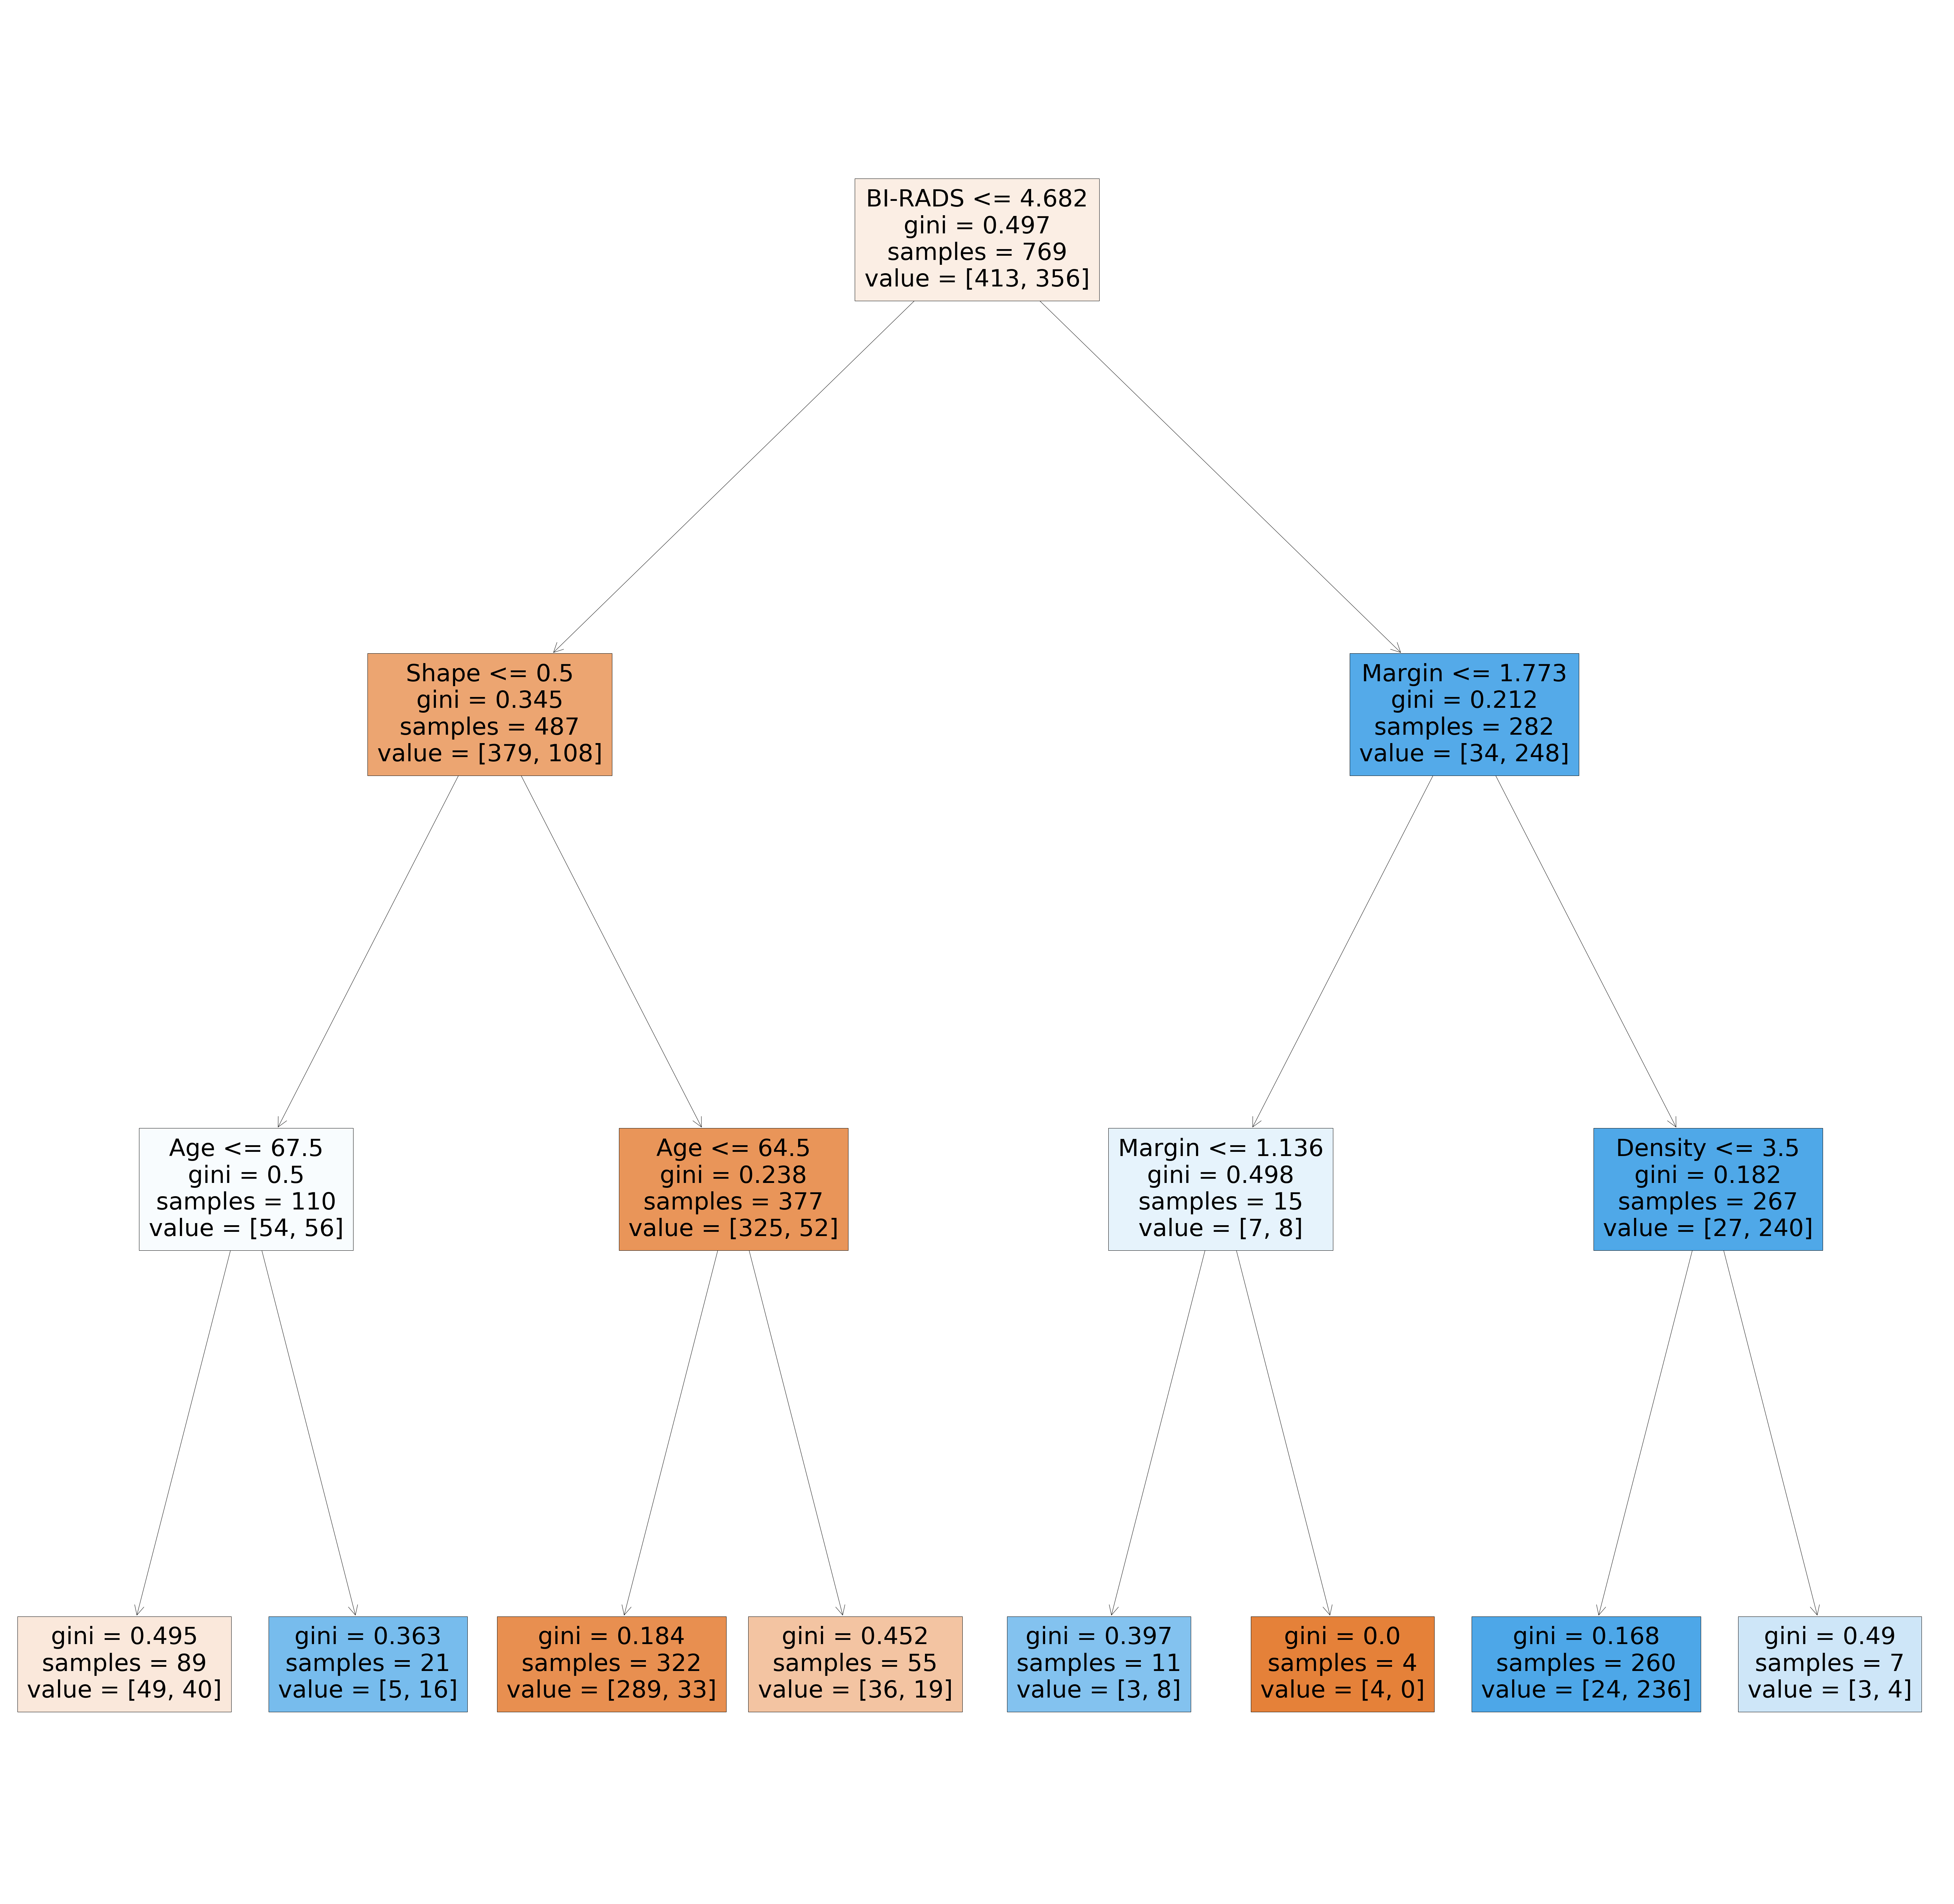

In [16]:
# https://medium.com/@mohtedibf/indepth-parameter-tuning-for-decision-tree-6753118a03c3
# check dtree parameters

from matplotlib import pyplot as plt
from sklearn import tree
feature_names = X.columns
fig = plt.figure(figsize=(100,100))
_ = tree.plot_tree(dtree, 
                   feature_names=feature_names,  
                   filled=True)

# Logistic Regression

In [17]:
from sklearn.linear_model import LogisticRegression

# all parameters not specified are set to their defaults
logisticRegr = LogisticRegression(random_state=random_seed)

y_pred = cross_val_predict(logisticRegr, X, y, cv=cv_)

lr_cmatrix = confusion_matrix(y, y_pred)
lr_report = get_classification_report(y, y_pred)

report = cmdata_report(lr_cmatrix, 'Logistic Regression', report)

tprs = []
aucs = []
for train,test in cv_.split(X,y):
    prediction = logisticRegr.fit(X.iloc[train],y.iloc[train]).predict_proba(X.iloc[test])
    fpr, tpr, t = roc_curve(y[test], prediction[:, 1])
    tprs.append(interp(mean_fpr, fpr, tpr))

logisticRegr_tpr = np.mean(tprs, axis=0)
logisticRegr_auc = auc(mean_fpr, logisticRegr_tpr)


# K-NN(k-Nearest-Neighbors)

Default cfg: 'p'=2, 'n_neighbors'=5

In [18]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
y_pred = cross_val_predict(knn, X, y, cv=cv_)
knn.fit(X,y)
knn_cmatrix = confusion_matrix(y, y_pred)
default_knn_report = get_classification_report(y, y_pred)
default = cmdata_report(knn_cmatrix, 'k-NN', default)


Tuning k-NN 'n_neighbors' parameter

In [19]:
neighbors = list(range(1,30))
distances = [1, 2, 3, 4, 5]

for d in distances: 
    knn = KNeighborsClassifier(p=d)
    y_pred = cross_val_predict(knn, X, y, cv=cv_)
    knn.fit(X,y)
    knn_cmatrix = confusion_matrix(y, y_pred)
    classifier = 'k-NN distance:' + str(d)
    knn_df_dist = cmdata_report(knn_cmatrix, classifier, knn_df_dist)


for n in neighbors: 
    knn = KNeighborsClassifier(n_neighbors = n, p=1)
    y_pred = cross_val_predict(knn, X, y, cv=5)
    knn.fit(X,y)
    knn_cmatrix = confusion_matrix(y, y_pred)
    classifier = 'k-NN' + str(n)
    knn_df = cmdata_report(knn_cmatrix, classifier, knn_df)
    
knn_df = knn_df.sort_values('AUC', ascending=False)

In [20]:
knn_df_dist

,TPR,TNR,FPR,FNR,AUC,G-Mean,F1,G-Measure
k-NN distance:1,0.817829,0.795506,0.204494,0.182171,0.806668,0.806590,0.820214,0.820217
k-NN distance:2,0.794574,0.806742,0.193258,0.205426,0.800658,0.800634,0.810277,0.810435
k-NN distance:3,0.798450,0.788764,0.211236,0.201550,0.793607,0.793592,0.806262,0.806301
k-NN distance:4,0.794574,0.766292,0.233708,0.205426,0.780433,0.780305,0.796117,0.796118
k-NN distance:5,0.806202,0.786517,0.213483,0.193798,0.796359,0.796298,0.810127,0.810136


In [21]:
knn_df

,TPR,TNR,FPR,FNR,AUC,G-Mean,F1,G-Measure
k-NN9,0.823643,0.820225,0.179775,0.176357,0.821934,0.821932,0.832517,0.832565
k-NN7,0.813953,0.820225,0.179775,0.186047,0.817089,0.817083,0.826772,0.826874
k-NN11,0.810078,0.822472,0.177528,0.189922,0.816275,0.816251,0.825271,0.825417
k-NN8,0.848837,0.779775,0.220225,0.151163,0.814306,0.813574,0.832700,0.832850
k-NN10,0.839147,0.788764,0.211236,0.160853,0.813956,0.813566,0.830297,0.830343
k-NN27,0.786822,0.835955,0.164045,0.213178,0.811388,0.811016,0.816080,0.816645
k-NN5,0.819767,0.800000,0.200000,0.180233,0.809884,0.809823,0.822957,0.822963
k-NN23,0.792636,0.824719,0.175281,0.207364,0.808677,0.808518,0.815553,0.815894
k-NN29,0.782946,0.833708,0.166292,0.217054,0.808327,0.807928,0.812877,0.813472
k-NN25,0.788760,0.826966,0.173034,0.211240,0.807863,0.807637,0.814000,0.814417


As we can see, 9 neighbors(using median and most freq to update missing values, 8 with mean) is the best number of neighbors and p=1(manhattan distance) the best 'p'

In [22]:
knn = KNeighborsClassifier(n_neighbors = 9, p=1)
y_pred = cross_val_predict(knn, X, y, cv=cv_)
knn.fit(X,y)
knn_cmatrix = confusion_matrix(y, y_pred)
knn_report = get_classification_report(y, y_pred)
report = cmdata_report(knn_cmatrix, 'k-NN', report)

tprs = []
aucs = []
for train,test in cv_.split(X,y):
    prediction = knn.fit(X.iloc[train],y.iloc[train]).predict_proba(X.iloc[test])
    fpr, tpr, t = roc_curve(y[test], prediction[:, 1])
    tprs.append(interp(mean_fpr, fpr, tpr))

knn_tpr = np.mean(tprs, axis=0)
knn_auc = auc(mean_fpr, knn_tpr)

# C-Support Vector Classification

default cfg: 'kernel'=rbf

In [23]:
from sklearn import svm
# Laplace RBF kernel
svc = svm.SVC(random_state=random_seed, probability=True)

y_pred = cross_val_predict(svc, X, y, cv=cv_)

svc_cmatrix = confusion_matrix(y, y_pred)
default_svc_report = get_classification_report(y, y_pred)

default = cmdata_report(svc_cmatrix, 'C-Support Vector Classification', default)

In [24]:
# linear hyperplane
svc = svm.SVC(kernel='linear', random_state=random_seed, probability=True)


y_pred = cross_val_predict(svc, X, y, cv=cv_)

svc_cmatrix = confusion_matrix(y, y_pred)
svc_report = get_classification_report(y, y_pred)

report = cmdata_report(svc_cmatrix, 'C-Support Vector Classification', report)

tprs = []
aucs = []
for train,test in cv_.split(X,y):
    prediction = svc.fit(X.iloc[train],y.iloc[train]).predict_proba(X.iloc[test])
    fpr, tpr, t = roc_curve(y[test], prediction[:, 1])
    tprs.append(interp(mean_fpr, fpr, tpr))

svc_tpr = np.mean(tprs, axis=0)
svc_auc = auc(mean_fpr, svc_tpr)

# Naive-Bayes

In [25]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()

y_pred = cross_val_predict(nb, X, y, cv=cv_)

nb_cmatrix = confusion_matrix(y, y_pred)
nb_report = get_classification_report(y, y_pred)

report = cmdata_report(nb_cmatrix, 'Gaussian Naive-Bayes', report)

tprs = []
aucs = []
for train,test in cv_.split(X,y):
    prediction = nb.fit(X.iloc[train],y.iloc[train]).predict_proba(X.iloc[test])
    fpr, tpr, t = roc_curve(y[test], prediction[:, 1])
    tprs.append(interp(mean_fpr, fpr, tpr))

nb_tpr = np.mean(tprs, axis=0)
nb_auc = auc(mean_fpr, nb_tpr)

# VISUALIZATION

# ROC CURVE

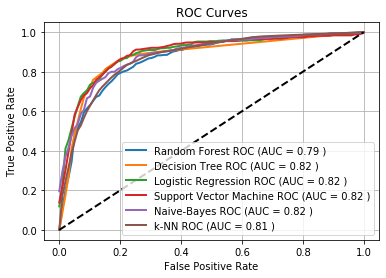

In [26]:
plt.plot(mean_fpr, rfc_tpr,
         label=r'Random Forest ROC (AUC = %0.2f )' % (report.AUC['Random Forest']),lw=2, alpha=1)
plt.plot(mean_fpr, dtree_tpr,
         label=r'Decision Tree ROC (AUC = %0.2f )' % (report.AUC['Decision Tree']),lw=2, alpha=1)
plt.plot(mean_fpr, logisticRegr_tpr,
         label=r'Logistic Regression ROC (AUC = %0.2f )' % (report.AUC['Logistic Regression']),lw=2, alpha=1)
plt.plot(mean_fpr, svc_tpr,
         label=r'Support Vector Machine ROC (AUC = %0.2f )' % (report.AUC['C-Support Vector Classification']),lw=2, alpha=1)
plt.plot(mean_fpr, nb_tpr,
         label=r'Naive-Bayes ROC (AUC = %0.2f )' % (report.AUC['Gaussian Naive-Bayes']),lw=2, alpha=1)
plt.plot(mean_fpr,knn_tpr,
         label=r'k-NN ROC (AUC = %0.2f )' % (report.AUC['k-NN']),lw=2, alpha=1)

plt.plot([0,1],[0,1],linestyle = '--',lw = 2,color = 'black')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend(loc="lower right")
plt.grid()
plt.show()

# Visualización de las medidas

In [27]:
report

,TPR,TNR,FPR,FNR,AUC,G-Mean,F1,G-Measure
Random Forest,0.810078,0.779775,0.220225,0.189922,0.794926,0.794782,0.810078,0.810078
Decision Tree,0.860465,0.773034,0.226966,0.139535,0.816749,0.815579,0.836946,0.837259
Logistic Regression,0.821705,0.824719,0.175281,0.178295,0.823212,0.823211,0.833006,0.833085
k-NN,0.804264,0.813483,0.186517,0.195736,0.808873,0.808860,0.818540,0.818669
C-Support Vector Classification,0.839147,0.797753,0.202247,0.160853,0.818450,0.818188,0.833494,0.833513
Gaussian Naive-Bayes,0.779070,0.853933,0.146067,0.220930,0.816501,0.815643,0.817904,0.818922


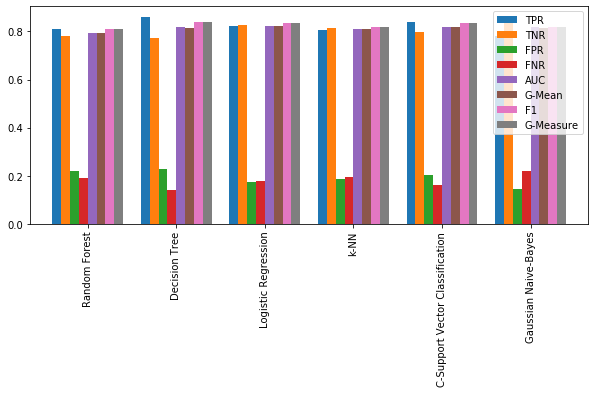

In [28]:
report.plot(kind = 'bar', width=0.8, figsize=(10,4))

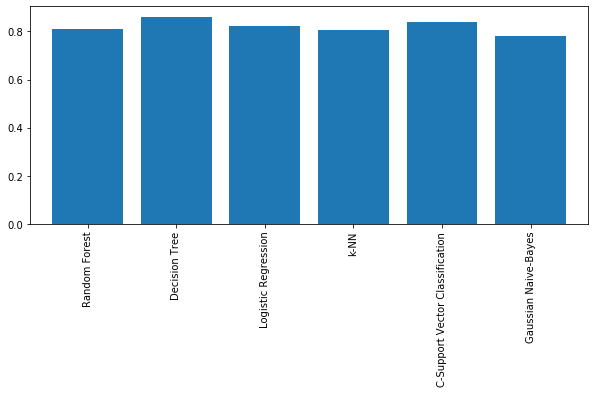

In [29]:
report.TPR.plot(kind = 'bar', width=0.8, figsize=(10,4))

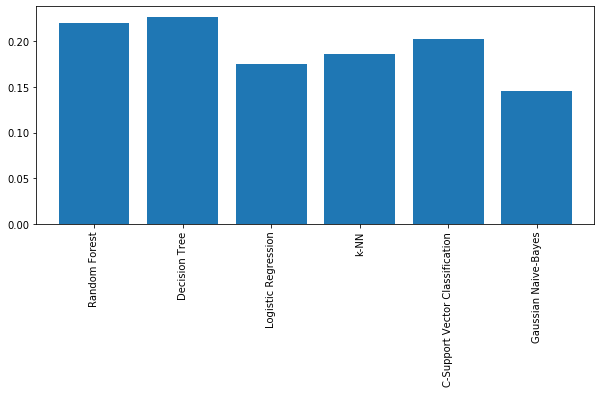

In [30]:
report.FPR.plot(kind = 'bar', width=0.8, figsize=(10,4))

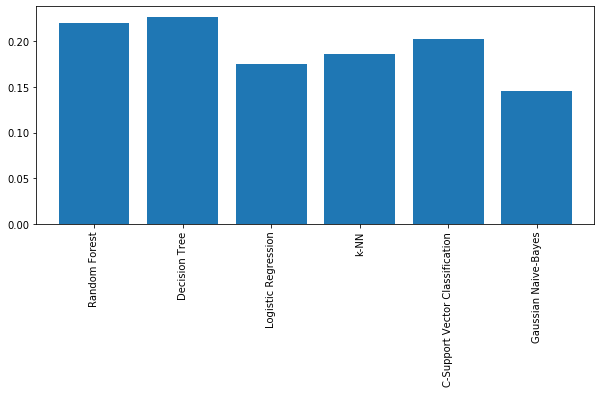

In [31]:
report.FPR.plot(kind = 'bar', width=0.8, figsize=(10,4))

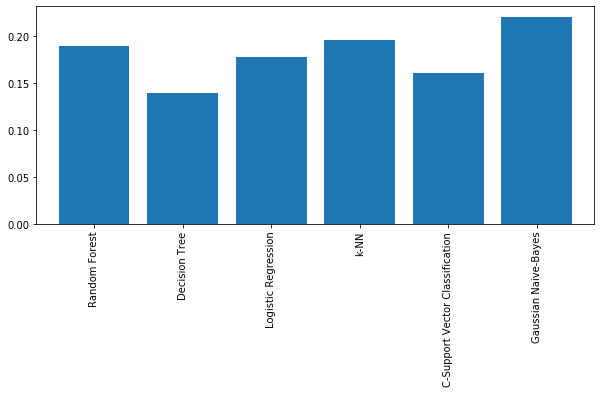

In [32]:
report.FNR.plot(kind = 'bar', width=0.8, figsize=(10,4))

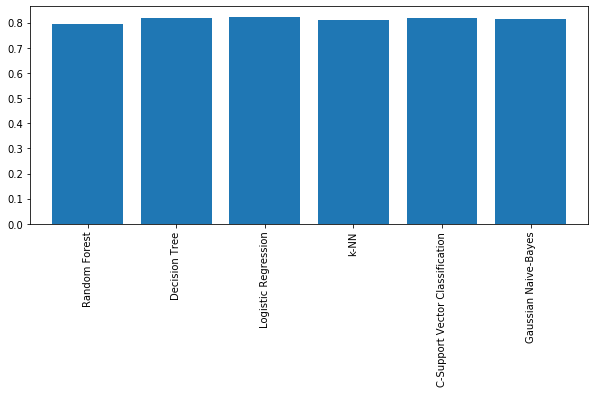

In [33]:
report.AUC.plot(kind = 'bar', width=0.8, figsize=(10,4))

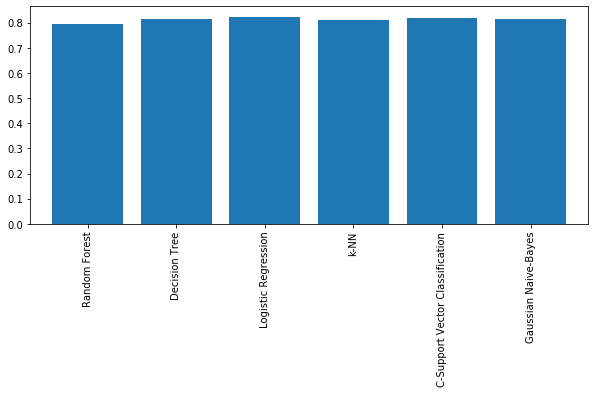

In [34]:
report['G-Mean'].plot(kind = 'bar', width=0.8, figsize=(10,4))

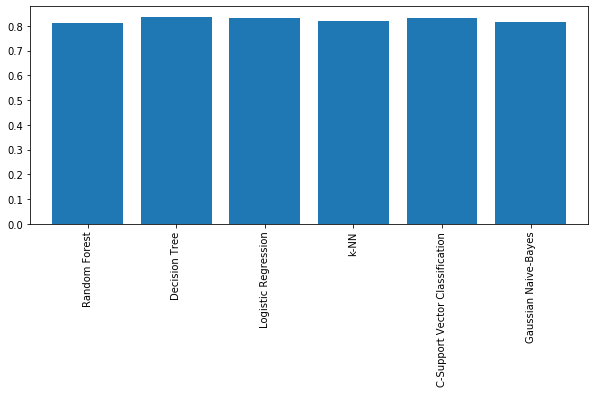

In [35]:
report.F1.plot(kind = 'bar', width=0.8, figsize=(10,4))

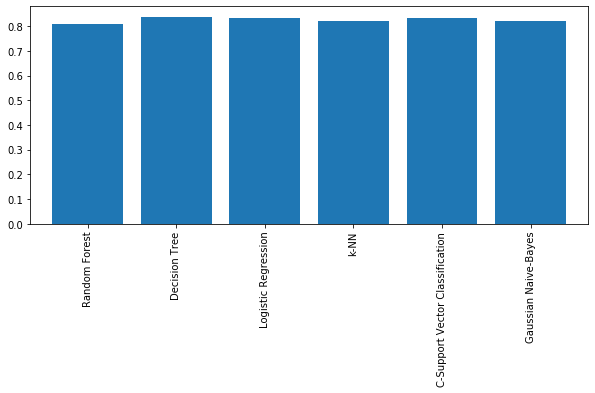

In [36]:
report['G-Measure'].plot(kind = 'bar', width=0.8, figsize=(10,4))